In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("Students Performance Dataset.csv")
data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
data.shape

(5000, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
data["Parent_Education_Level"].value_counts(dropna=False)

Parent_Education_Level
NaN            1025
Bachelor's     1020
PhD            1012
Master's       1000
High School     943
Name: count, dtype: int64

In [6]:
data["Parent_Education_Level"].fillna(
    data["Parent_Education_Level"].mode()[0],
    inplace=True
)

In [7]:
data.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [8]:
data.drop(
    columns=["Student_ID", "First_Name", "Last_Name", "Email"],
    inplace=True
)

In [9]:
def get_performance(score):
    if score >= 85:
        return "High"
    elif score >= 60:
        return "Medium"
    else:
        return "At_Risk"

data["Performance_Category"] = data["Final_Score"].apply(get_performance)

In [10]:
data["Performance_Category"].value_counts()

Performance_Category
Medium     2126
At_Risk    1704
High       1170
Name: count, dtype: int64

In [11]:
data["Study_Efficiency"] = (
    data["Study_Hours_per_Week"] / (data["Stress_Level (1-10)"] + 1)
)

data["Sleep_Deficit"] = 8 - data["Sleep_Hours_per_Night"]

data["Attendance_Risk"] = (data["Attendance (%)"] < 75).astype(int)

In [12]:
X = data.drop(["Final_Score", "Performance_Category"], axis=1)
y = data["Performance_Category"]

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

label_encoder.classes_

array(['At_Risk', 'High', 'Medium'], dtype=object)

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
feature_names = X.columns

In [16]:
X_tree = X.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X.shape

(5000, 29)

In [18]:
X_train_tree, X_test_tree, y_train, y_test = train_test_split(
    X_tree,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Logistic Regression Results")
print(classification_report(
    y_test,
    lr_preds,
    target_names=label_encoder.classes_
))

Logistic Regression Results
              precision    recall  f1-score   support

     At_Risk       0.99      0.99      0.99       341
        High       0.98      0.98      0.98       234
      Medium       0.98      0.99      0.98       425

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [20]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train_tree, y_train)

xgb_preds = xgb.predict(X_test_tree)

print("XGBoost Results")
print(classification_report(
    y_test,
    xgb_preds,
    target_names=label_encoder.classes_
))

XGBoost Results
              precision    recall  f1-score   support

     At_Risk       0.90      0.87      0.88       341
        High       0.88      0.76      0.82       234
      Medium       0.78      0.87      0.82       425

    accuracy                           0.84      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [21]:
importances = xgb.feature_importances_

feature_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

feature_importance = feature_importance.sort_values(
    by="importance",
    ascending=False
)

feature_importance.head(10)

,feature,importance
21,Grade_F,0.108377
18,Grade_B,0.102977
7,Total_Score,0.099813
19,Grade_C,0.083781
20,Grade_D,0.078922
6,Projects_Score,0.069661
2,Midterm_Score,0.053158
3,Assignments_Avg,0.046429
5,Participation_Score,0.038474
4,Quizzes_Avg,0.033981


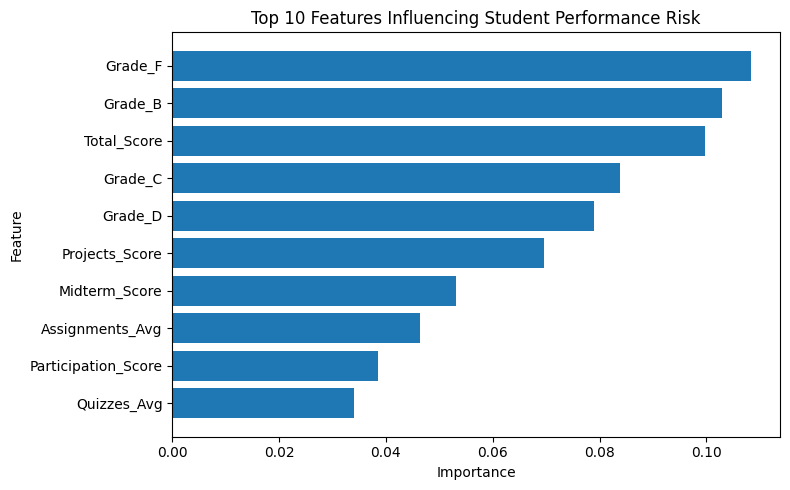

In [22]:
plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance["feature"].head(10)[::-1],
    feature_importance["importance"].head(10)[::-1]
)
plt.title("Top 10 Features Influencing Student Performance Risk")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [23]:
import joblib

joblib.dump(xgb, "student_risk_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(feature_names, "feature_names.pkl")

['feature_names.pkl']

In [24]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import shap

In [26]:
explainer = shap.Explainer(xgb, X_train_scaled)
shap_values = explainer(X_train_scaled)

 99%|===================| 11923/12000 [01:19<00:00]        

In [27]:
student_index = 0

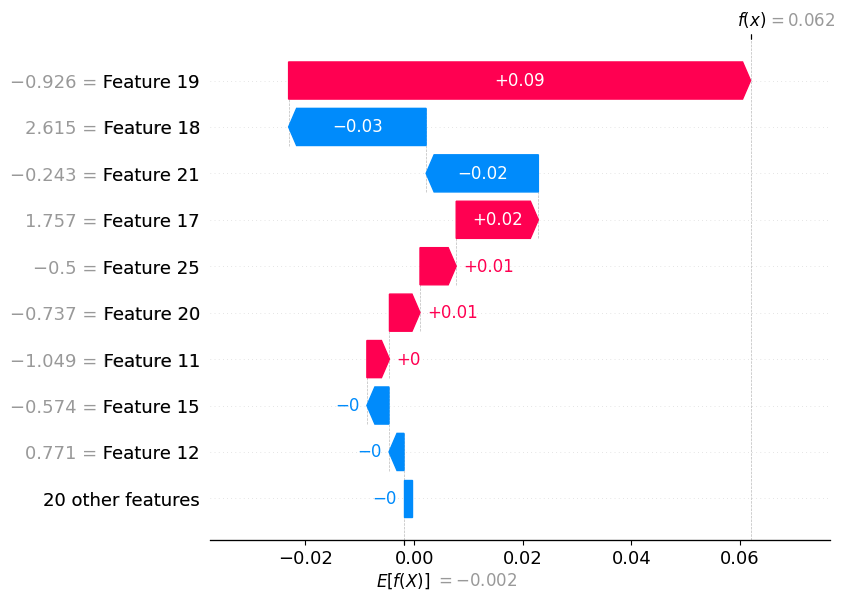

In [28]:
shap.plots.waterfall(
    shap_values[student_index, :, 0],
    max_display=10
)

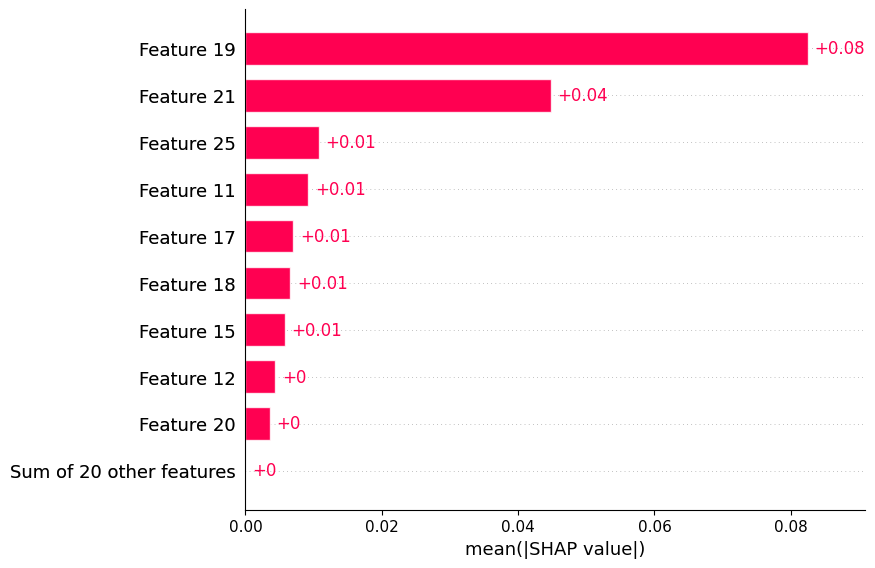

In [29]:
shap.plots.bar(
    shap_values[:, :, 0],
    max_display=10
)

In [30]:
type(shap_values), len(shap_values)

(shap._explanation.Explanation, 4000)

In [31]:
shap_values.values.shape

(4000, 29, 3)

In [32]:
shap.initjs()